In [1]:
#Load the libraries
import os
import numpy as np
import pandas as pd
from fancyimpute import KNN   
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Using TensorFlow backend.


In [2]:
# Set working directory
os.chdir("E:\edWisor\Project")

In [3]:
# Load the data
emp_abs = pd.read_excel("Absenteeism_at_work_Project.xls")

In [4]:
emp_abs.shape

(740, 21)

In [5]:
emp_abs.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
emp_abs.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [7]:
emp_abs.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [8]:
emp_abs.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
# Exploratory data analysis
emp_abs['ID'] = emp_abs['ID'].astype('category')
emp_abs['Reason for absence'] = emp_abs['Reason for absence'].replace(0,20)
emp_abs['Reason for absence'] = emp_abs['Reason for absence'].astype('category')
emp_abs['Month of absence'] = emp_abs['Month of absence'].replace(0,np.nan)
emp_abs['Month of absence'] = emp_abs['Month of absence'].astype('category')
emp_abs['Day of the week'] = emp_abs['Day of the week'].astype('category')
emp_abs['Seasons'] = emp_abs['Seasons'].astype('category')
emp_abs['Disciplinary failure'] = emp_abs['Disciplinary failure'].astype('category')
emp_abs['Education'] = emp_abs['Education'].astype('category')
emp_abs['Son'] = emp_abs['Son'].astype('category')
emp_abs['Social drinker'] = emp_abs['Social drinker'].astype('category')
emp_abs['Social smoker'] = emp_abs['Social smoker'].astype('category')
emp_abs['Pet'] = emp_abs['Pet'].astype('category')

In [10]:
emp_abs.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

Missing value analysis

In [11]:
# Creating missing value analysis
missing_val = pd.DataFrame(emp_abs.isnull().sum())

# Resetting index
missing_val = missing_val.reset_index()

# Rename variables
missing_val = missing_val.rename(columns={'index':"Variables",0:"Missing_perc"})

#Calculate percentage
missing_val['Missing_perc'] = (missing_val['Missing_perc']/len(emp_abs))*100

# Descending order
missing_val = missing_val.sort_values('Missing_perc',ascending = False).reset_index(drop = True)

# Save the missing percentage document
missing_val.to_csv("Missing_perc_emp_abs_python.csv",index = False)

missing_val

,Variables,Missing_perc
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


Imputation method

In [12]:
emp_abs['Body mass index'].loc[5]

31.0

In [13]:
# Actual value = 31
# Mean imputed value = 26.6779
# Median imputed value = 25.0
# KNN imputed value = 31

In [14]:
emp_abs['Body mass index'].loc[5] = np.nan

C:\Users\GANESH\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
emp_abs['Body mass index'].loc[5]

nan

In [16]:
# Impute with mean
#emp_abs['Body mass index'] = emp_abs['Body mass index'].fillna(emp_abs['Body mass index'].mean())

# Impute with median
#emp_abs['Body mass index'] = emp_abs['Body mass index'].fillna(emp_abs['Body mass index'].median())

# KNN imputation
emp_abs = pd.DataFrame(KNN(k=3).fit_transform(emp_abs), columns = emp_abs.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.203
Imputing row 101/740 with 1 missing, elapsed time: 0.324
Imputing row 201/740 with 0 missing, elapsed time: 0.326
Imputing row 301/740 with 0 missing, elapsed time: 0.328
Imputing row 401/740 with 0 missing, elapsed time: 0.329
Imputing row 501/740 with 0 missing, elapsed time: 0.330
Imputing row 601/740 with 0 missing, elapsed time: 0.331
Imputing row 701/740 with 0 missing, elapsed time: 0.332


In [17]:
# Converting data in proper data type
for i in emp_abs:
    emp_abs.loc[:,i] = emp_abs.loc[:,i].round()

In [18]:
emp_abs['Body mass index'].iloc[5]

31.0

In [19]:
emp_abs.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [20]:
# Categorizing data based on continuous and categorical variables

continuous_names =['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ',
                   'Hit target','Weight','Height','Body mass index','Absenteeism time in hours']
categorical_names =['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education',
                    'Son','Social drinker','Social smoker','Pet']
for i in categorical_names:
    emp_abs.loc[:,i] = emp_abs.loc[:,i].round()
    emp_abs.loc[:,i] = emp_abs.loc[:,i].astype('category')

In [21]:
emp_abs.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [22]:
# Creating backup file
df = emp_abs.copy()
# emp_abs = df.copy()

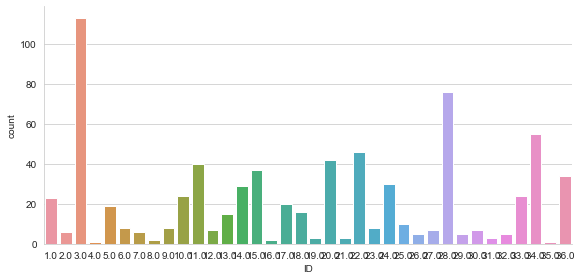

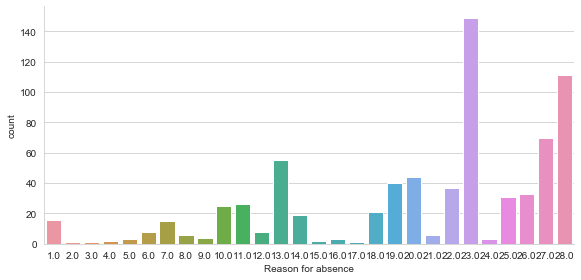

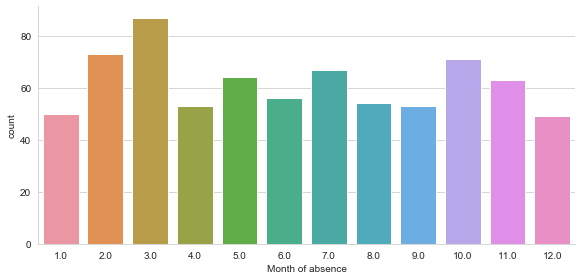

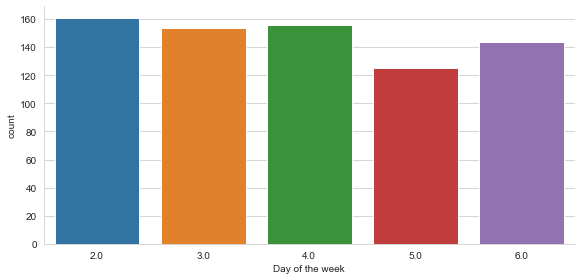

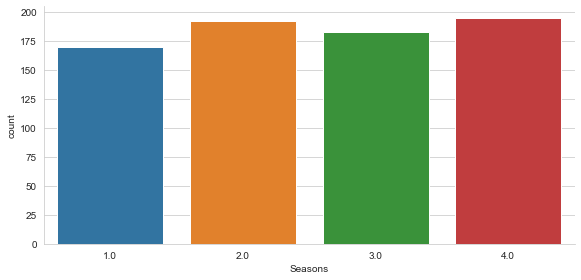

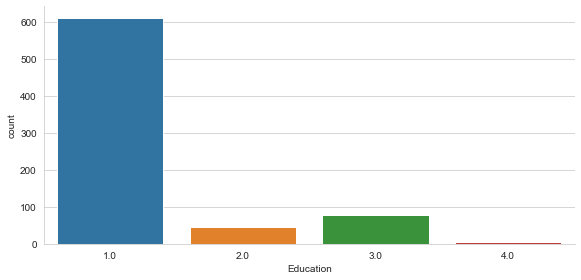

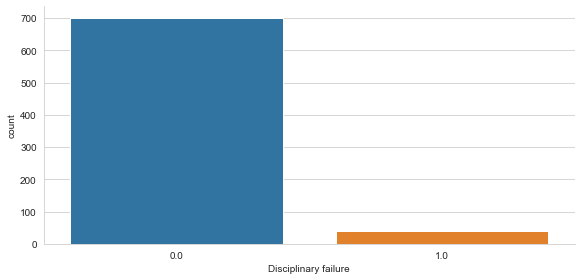

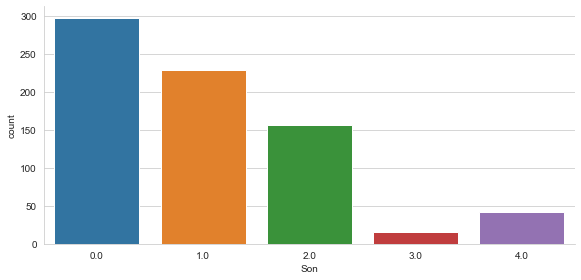

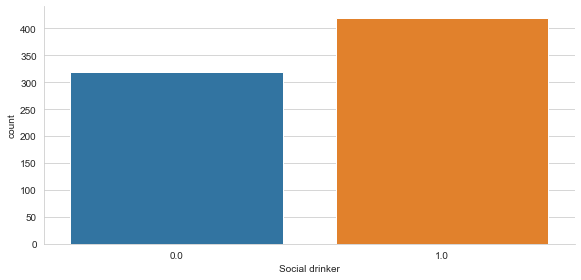

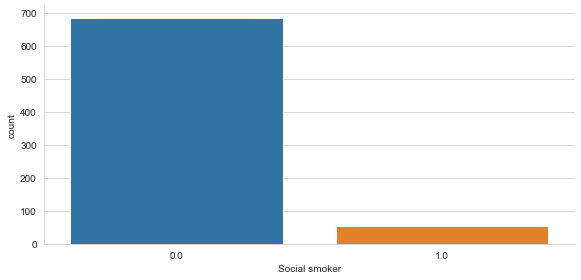

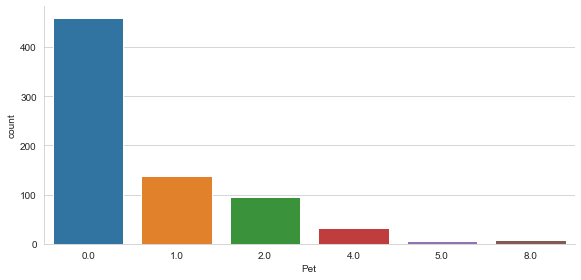

In [23]:
#Visualization
sns.set_style("whitegrid")
sns.catplot(data=emp_abs, x='ID', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Reason for absence', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Month of absence', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Day of the week', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Seasons', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Education', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Disciplinary failure', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Son', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Social drinker', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Social smoker', kind= 'count',height=4,aspect=2)
sns.catplot(data=emp_abs, x='Pet', kind= 'count',height=4,aspect=2)

Outlier analysis

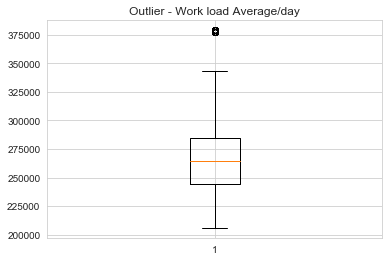

In [24]:
# Box plot to visualize outliers
%matplotlib inline
plt.boxplot(emp_abs['Work load Average/day '])
plt.title("Outlier - Work load Average/day")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

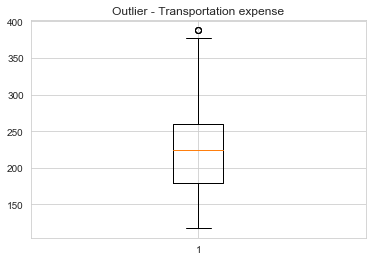

In [25]:
# Box plot to visualize outliers
%matplotlib inline
plt.boxplot(emp_abs['Transportation expense'])
plt.title("Outlier - Transportation expense")
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

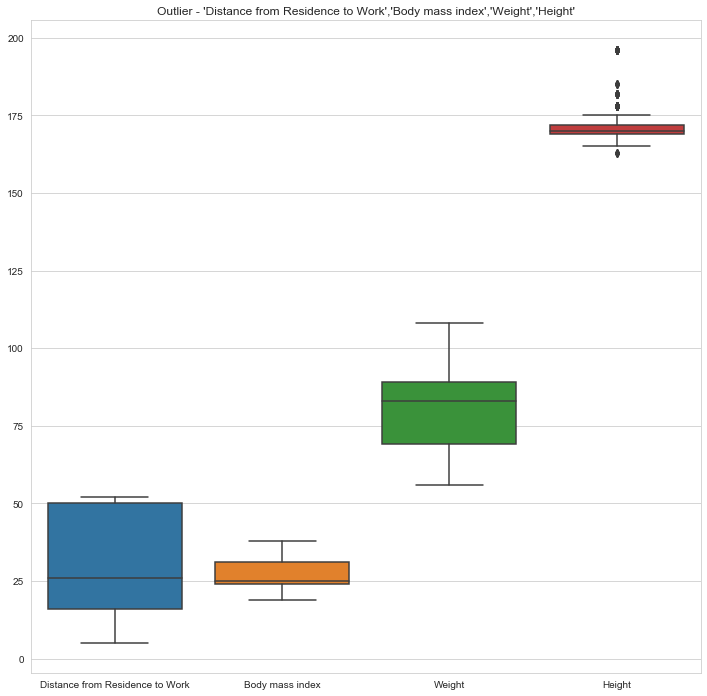

In [26]:
sns.boxplot(data = emp_abs[['Distance from Residence to Work','Body mass index','Weight','Height']])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title("Outlier - 'Distance from Residence to Work','Body mass index','Weight','Height'")
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

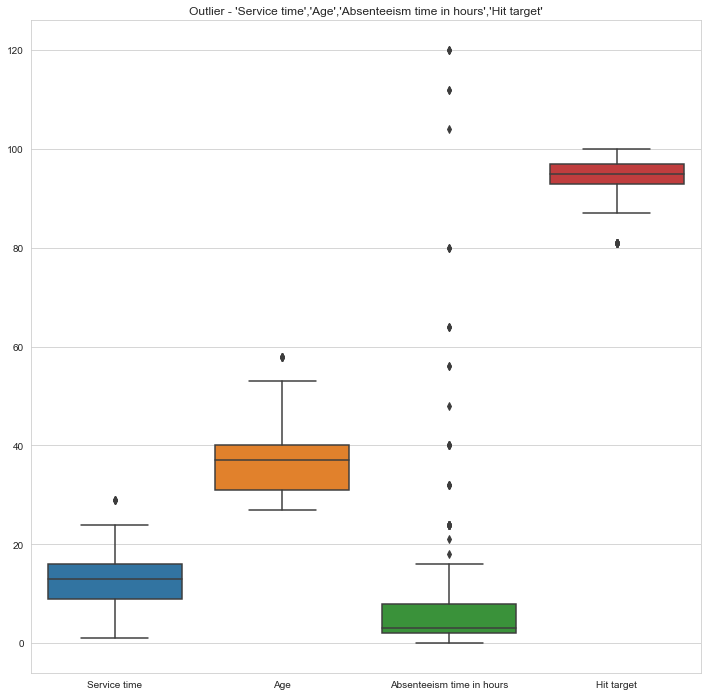

In [27]:
sns.boxplot(data = emp_abs[['Service time','Age','Absenteeism time in hours','Hit target']])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title("Outlier - 'Service time','Age','Absenteeism time in hours','Hit target'")
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')

In [28]:
# Detect and replace outlier with NA
#Extract quartiles
Te_q75, Te_q25 = np.percentile(emp_abs['Transportation expense'], [75 ,25])

#Calculate IQR
Te_iqr = Te_q75 - Te_q25

#Calculate inner and outer fence
Te_minimum = Te_q25 - (Te_iqr*1.5)
Te_maximum = Te_q75 + (Te_iqr*1.5)

# Replace outlier with np.nan
emp_abs.loc[emp_abs['Transportation expense']< Te_minimum,'Transportation expense'] = np.nan
emp_abs.loc[emp_abs['Transportation expense']> Te_maximum,'Transportation expense'] = np.nan

In [29]:
#Extract quartiles
Wl_q75, Wl_q25 = np.percentile(emp_abs['Work load Average/day '], [75 ,25])

#Calculate IQR
Wl_iqr = Wl_q75 - Wl_q25

#Calculate inner and outer fence
Wl_minimum = Wl_q25 - (Wl_iqr*1.5)
Wl_maximum = Wl_q75 + (Wl_iqr*1.5)

# Replace outlier with np.nan
emp_abs.loc[emp_abs['Work load Average/day ']< Wl_minimum,'Work load Average/day '] = np.nan
emp_abs.loc[emp_abs['Work load Average/day ']> Wl_maximum,'Work load Average/day '] = np.nan

In [30]:
#Extract quartiles
H_q75, H_q25 = np.percentile(emp_abs['Height'], [75 ,25])

#Calculate IQR
H_iqr = H_q75 - H_q25

#Calculate inner and outer fence
H_minimum = H_q25 - (H_iqr*1.5)
H_maximum = H_q75 + (H_iqr*1.5)

# Replace outlier with np.nan
emp_abs.loc[emp_abs['Height']< H_minimum,'Height'] = np.nan
emp_abs.loc[emp_abs['Height']> H_maximum,'Height'] = np.nan

In [31]:
#Extract quartiles
St_q75, St_q25 = np.percentile(emp_abs['Service time'], [75 ,25])

#Calculate IQR
St_iqr = St_q75 - St_q25

#Calculate inner and outer fence
St_minimum = St_q25 - (St_iqr*1.5)
St_maximum = St_q75 + (St_iqr*1.5)

# Replace outlier with np.nan
emp_abs.loc[emp_abs['Service time']< St_minimum,'Service time'] = np.nan
emp_abs.loc[emp_abs['Service time']> St_maximum,'Service time'] = np.nan


In [32]:
#Extract quartiles
A_q75, A_q25 = np.percentile(emp_abs['Age'], [75 ,25])

#Calculate IQR
A_iqr = A_q75 - A_q25

#Calculate inner and outer fence
A_minimum = A_q25 - (A_iqr*1.5)
A_maximum = A_q75 + (A_iqr*1.5)

# Replace outlier with np.nan
emp_abs.loc[emp_abs['Age']< A_minimum,'Age'] = np.nan
emp_abs.loc[emp_abs['Age']> A_maximum,'Age'] = np.nan

In [33]:
#Extract quartiles
At_q75, At_q25 = np.percentile(emp_abs['Absenteeism time in hours'], [75 ,25])

#Calculate IQR
At_iqr = At_q75 - At_q25

#Calculate inner and outer fence
At_minimum = At_q25 - (At_iqr*1.5)
At_maximum = At_q75 + (At_iqr*1.5)

# Replace outlier with np.nan
emp_abs.loc[emp_abs['Absenteeism time in hours']< At_minimum,'Absenteeism time in hours'] = np.nan
emp_abs.loc[emp_abs['Absenteeism time in hours']> At_maximum,'Absenteeism time in hours'] = np.nan

In [34]:
#Extract quartiles
Ht_q75, Ht_q25 = np.percentile(emp_abs['Hit target'], [75 ,25])

#Calculate IQR
Ht_iqr = Ht_q75 - Ht_q25

#Calculate inner and outer fence
Ht_minimum = Ht_q25 - (Ht_iqr*1.5)
Ht_maximum = Ht_q75 + (Ht_iqr*1.5)

# Replace outlier with np.nan
emp_abs.loc[emp_abs['Hit target']< Ht_minimum,'Hit target'] = np.nan
emp_abs.loc[emp_abs['Hit target']> Ht_maximum,'Hit target'] = np.nan

In [35]:
emp_abs.isnull().sum()

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               3
Distance from Residence to Work      0
Service time                         5
Age                                  8
Work load Average/day               31
Hit target                          19
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                             119
Body mass index                      0
Absenteeism time in hours           45
dtype: int64

In [36]:
# KNN imputation
emp_abs = pd.DataFrame(KNN(k=3).fit_transform(emp_abs), columns = emp_abs.columns)

emp_abs.isnull().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.158
Imputing row 101/740 with 1 missing, elapsed time: 0.160
Imputing row 201/740 with 0 missing, elapsed time: 0.163
Imputing row 301/740 with 0 missing, elapsed time: 0.169
Imputing row 401/740 with 0 missing, elapsed time: 0.171
Imputing row 501/740 with 0 missing, elapsed time: 0.174
Imputing row 601/740 with 0 missing, elapsed time: 0.177
Imputing row 701/740 with 0 missing, elapsed time: 0.181


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

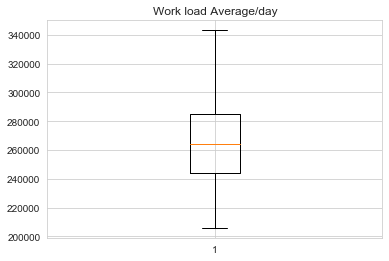

In [37]:
# Box plot to visualize outliers
%matplotlib inline
plt.boxplot(emp_abs['Work load Average/day '])
plt.title("Work load Average/day")
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')

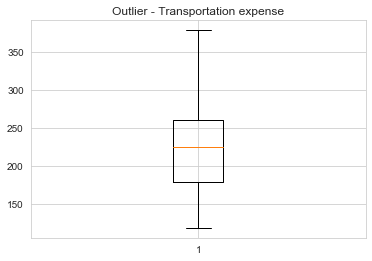

In [38]:
# Box plot to visualize outliers
%matplotlib inline
plt.boxplot(emp_abs['Transportation expense'])
plt.title("Outlier - Transportation expense")
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

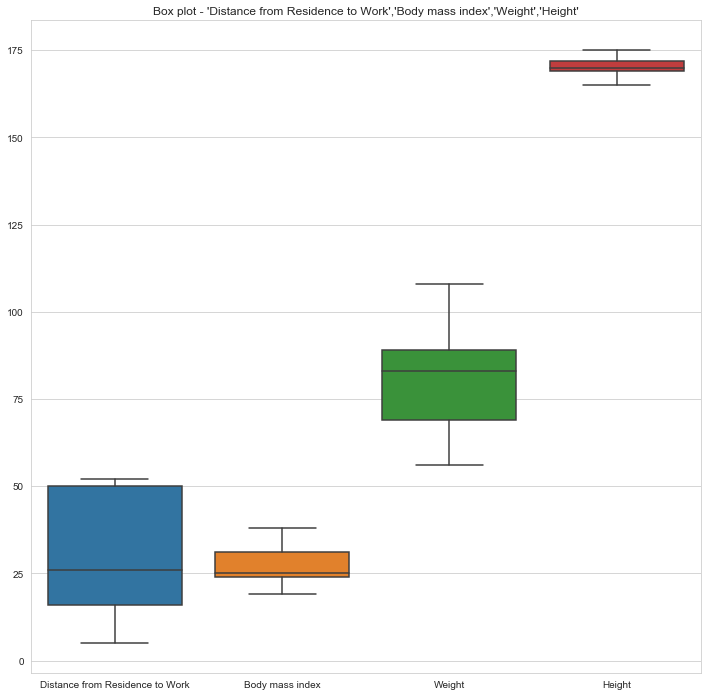

In [39]:
sns.boxplot(data = emp_abs[['Distance from Residence to Work','Body mass index','Weight','Height']])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title("Box plot - 'Distance from Residence to Work','Body mass index','Weight','Height'")
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')

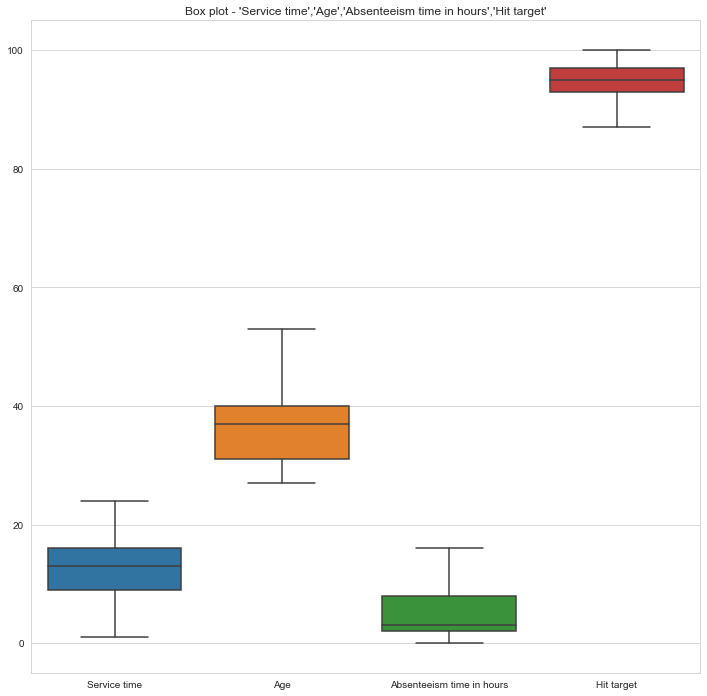

In [40]:
sns.boxplot(data = emp_abs[['Service time','Age','Absenteeism time in hours','Hit target']])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title("Box plot - 'Service time','Age','Absenteeism time in hours','Hit target'")
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')

Feature selection

In [41]:
# Correlation analysis
df_corr = emp_abs.loc[:,continuous_names]

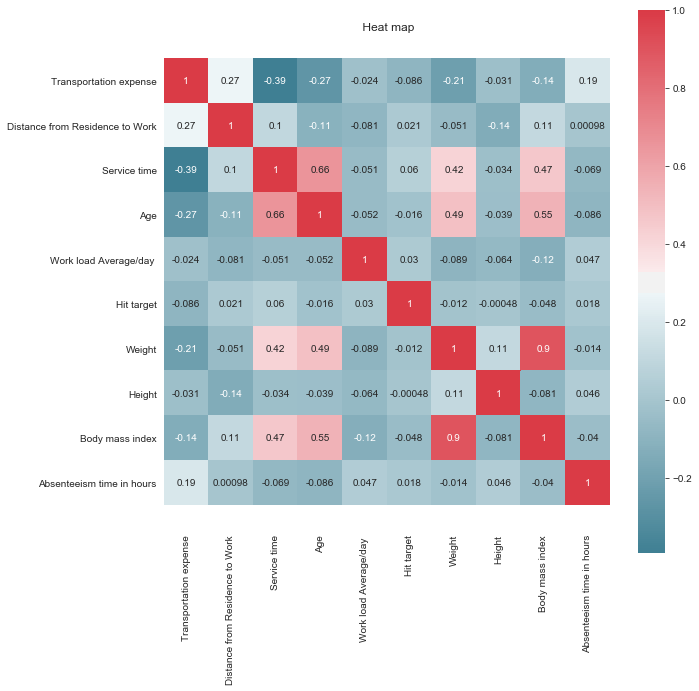

In [42]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate the correlation matrix
corr = df_corr.corr()

#Plot using seaborn library(bottom, top = ax1.get_ylim(),ax1.set_ylim(bottom + 0.5, top - 0.5)) is added to remove heat map cut-off
ax1 = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot =True)
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.title(" Heat map")
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')

In [43]:
# Weight shows strong correlation, hence it would be removed from the data
emp_abs = emp_abs.drop(['Weight'],axis=1)

In [44]:
emp_abs.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [45]:
df = emp_abs.copy()
#emp_abs = df.copy()

Feature Scaling

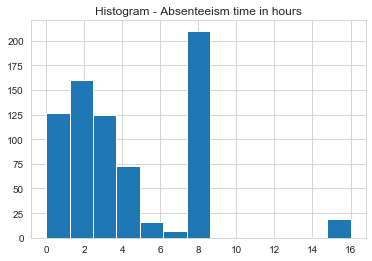

In [46]:
#Normality checks
%matplotlib inline  
plt.hist(emp_abs['Absenteeism time in hours'], bins='auto')
plt.title("Histogram - Absenteeism time in hours")
plt.savefig('plot10.png', dpi=300, bbox_inches='tight')

In [47]:
cnames = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ',
                   'Hit target','Height','Body mass index','Absenteeism time in hours']

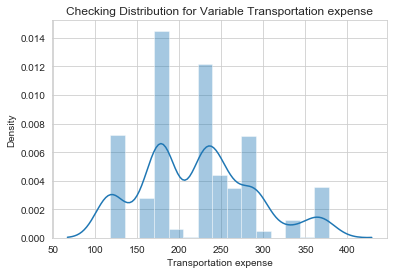

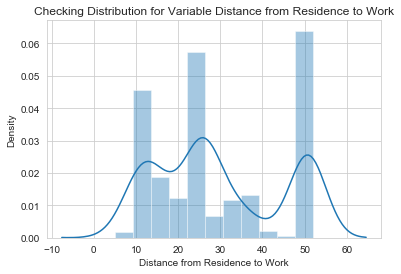

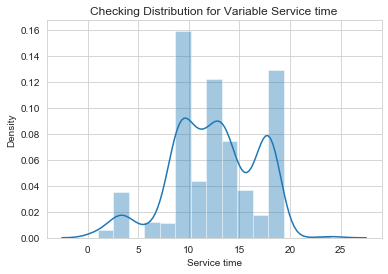

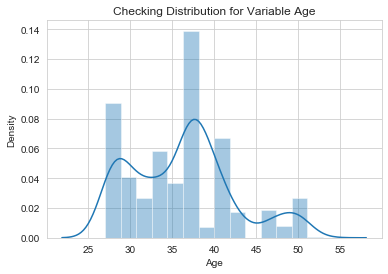

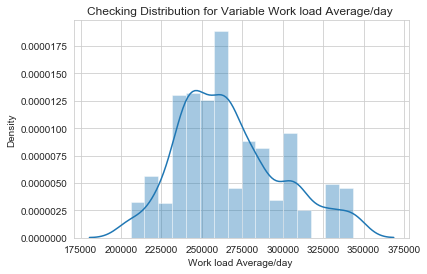

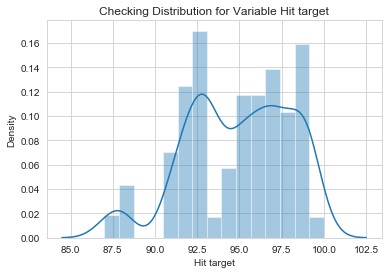

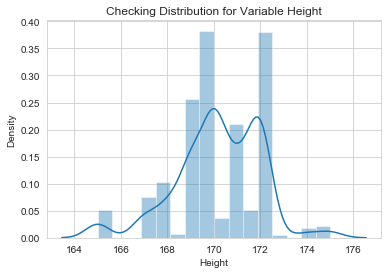

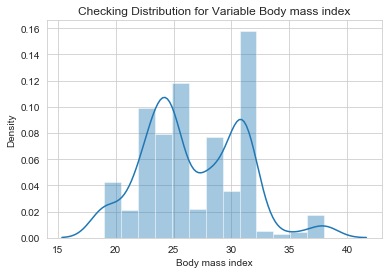

In [48]:
#Normality checks
for i in cnames:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(emp_abs[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel('Density')
    plt.show()

In [49]:
# Normalization
for i in cnames:
    if i == 'Absenteeism time in hours':
        continue
    emp_abs[i] = (emp_abs[i]-emp_abs[i].min())/(emp_abs[i].max()- emp_abs[i].min())

In [50]:
emp_abs.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.7,0.578947,4.0
1,36.0,20.0,7.0,3.0,1.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.631579,0.0
2,3.0,23.0,7.0,4.0,1.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,1.0,0.0,1.0,0.0,0.0,0.5,0.631579,2.0
3,7.0,7.0,7.0,5.0,1.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,1.0,2.0,1.0,1.0,0.0,0.3,0.263158,4.0
4,11.0,23.0,7.0,5.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.7,0.578947,2.0


PCA

In [51]:
#Create dummy variables of factor variables
df1 = pd.get_dummies(data = emp_abs, columns = categorical_names)

In [52]:
df1.shape

(740, 115)

In [53]:
df1.head(5)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1.0,...,Social drinker_0.0,Social drinker_1.0,Social smoker_0.0,Social smoker_1.0,Pet_0.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,4.0,0,...,0,1,1,0,0,1,0,0,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.5,0.631579,0.0,0,...,0,1,1,0,1,0,0,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.5,0.631579,2.0,0,...,0,1,1,0,1,0,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.3,0.263158,4.0,0,...,0,1,0,1,1,0,0,0,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,2.0,0,...,0,1,1,0,0,1,0,0,0,0


In [54]:
#Data frames with dummy copy
df2 = df1.copy()

In [55]:
#Converting data to numpy array
D_na = df1.values

In [56]:
df1.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'ID_1.0',
       ...
       'Social drinker_0.0', 'Social drinker_1.0', 'Social smoker_0.0',
       'Social smoker_1.0', 'Pet_0.0', 'Pet_1.0', 'Pet_2.0', 'Pet_4.0',
       'Pet_5.0', 'Pet_8.0'],
      dtype='object', length=115)

In [57]:
pca = PCA(n_components=114)
pca.fit(D_na)

PCA(copy=True, iterated_power='auto', n_components=114, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
#PCA variance explained
var = pca.explained_variance_ratio_
var_1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

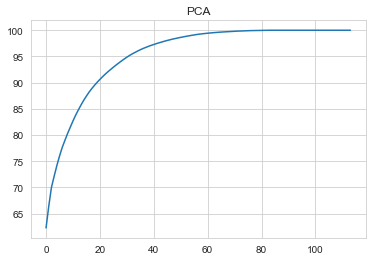

In [59]:
# PCA plot
plt.plot(var_1)
plt.title("PCA")
plt.savefig('plot11.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
#Selecting 40 components since it explains almost 97+ % data variance
pca = PCA(n_components=40)
pca.fit(D_na)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
target_v = df1['Absenteeism time in hours']

Model development

In [62]:
# Divide the data into test and train (simple random sampling)
X_train, X_test, y_train, y_test = train_test_split(D_na,target_v, test_size=0.2, random_state = 1)

In [63]:
#Decision tree
# Decision tree regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [64]:
#Apply model for test data
predictions_DT = fit_DT.predict(X_test)

In [65]:
#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': predictions_DT})
print(df_dt.head())

     actual      pred
681     8.0  7.923629
257     2.0  1.411799
527     8.0  7.923629
637     8.0  7.923629
429     4.0  3.440348


In [66]:
emp_abs['Absenteeism time in hours'].iloc[681]

8.0

In [67]:
#Define function to calculate RMSE
def RMSE(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [68]:
#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test,predictions_DT)))
print("R^2: "+str(r2_score(y_test,predictions_DT)))

RMSE: 0.5456006483456933
R^2: 0.9738544976012422


In [69]:
#Random forest
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

In [70]:
#Perdict for test cases
predictions_RF = rf_model.predict(X_test)

In [71]:
#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': predictions_RF})
print(df_rf.head())

     actual      pred
681     8.0  8.000000
257     2.0  2.000000
527     8.0  8.000000
637     8.0  8.000000
429     4.0  4.001428


In [72]:
#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test,predictions_RF)))
print("R^2:"+str(r2_score(y_test,predictions_RF)))

RMSE: 0.045233485755368785
R^2:0.9998202920257213


In [73]:
#Linear regression
lr_model = LinearRegression().fit(X_train,y_train)

In [74]:
predictions_LR = lr_model.predict(X_test)

In [75]:
#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': predictions_LR})
print(df_lr.head())

     actual  pred
681     8.0   8.0
257     2.0   2.0
527     8.0   8.0
637     8.0   8.0
429     4.0   4.0


In [76]:
#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test,predictions_LR)))
print("R^2: "+str(r2_score(y_test,predictions_LR)))

RMSE: 0.006291368885717461
R^2: 0.9999965235376019


In [77]:
# Save the model implemented document
df1.to_csv("Dummies_emp_abs_python.csv",index = False)